# Model Training & Evaluation

## Load and Inspect the Data

In [1]:
import pandas as pd

# Load cleaned data
train_df = pd.read_csv("cleaned_train.csv")
test_df = pd.read_csv("cleaned_test.csv")

# Display first few rows
train_df.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,False,True,False,False,False
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,True,False,False,False,True,False,False,False
2,Honda Jazz V,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,True,True,False,False,False
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,True,False,False,False,True,False,False,False
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,True,False,False,False,False,False,True,False


In [2]:
train_df.isnull().sum()

Name                           0
Location                       0
Year                           0
Kilometers_Driven              0
Mileage                        2
Engine                        36
Power                        143
Seats                          0
Price                          0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [3]:
test_df.isnull().sum()

Name                          0
Location                      0
Year                          0
Kilometers_Driven             0
Mileage                       0
Engine                       10
Power                        32
Seats                         0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [4]:
train_df = train_df.dropna()

In [5]:
train_df.isnull().sum()

Name                         0
Location                     0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

## Prepare Features & Target

In [6]:
# Drop unnecessary columns
X = train_df.drop(columns=["Price", "Name", "Location"])
y = train_df["Price"]

# Check features
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,False,False,False,False,True,False,False,False
1,2015,41000,19.67,1582.0,126.20,5.0,True,False,False,False,True,False,False,False
2,2011,46000,18.20,1199.0,88.70,5.0,False,False,False,True,True,False,False,False
3,2012,87000,20.77,1248.0,88.76,7.0,True,False,False,False,True,False,False,False
4,2013,40670,15.20,1968.0,140.80,5.0,True,False,False,False,False,False,True,False


## Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

Training samples: 4699, Validation samples: 1175


# Train Models

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_val)

# Evaluate
r2_lr = r2_score(y_val, y_pred_lr)
rmse_lr = mean_squared_error(y_val, y_pred_lr) ** 0.5
mae_lr = mean_absolute_error(y_val, y_pred_lr)

print(f"Linear Regression - R²: {r2_lr:.3f}, RMSE: {rmse_lr:.3f}, MAE: {mae_lr:.3f}")

Linear Regression - R²: 0.689, RMSE: 5.798, MAE: 3.773


## Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_train)

# Evaluate
r2_rf = r2_score(y_train, y_pred_rf)
rmse_rf = mean_squared_error(y_train, y_pred_rf) ** 0.5
mae_rf = mean_absolute_error(y_train, y_pred_rf)

print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}, MAE: {mae_rf:.3f}")

Random Forest - R²: 0.982, RMSE: 1.516, MAE: 0.619


## XGBoost Regressor

In [10]:
from xgboost import XGBRegressor

# Train model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_train)

# Evaluate
r2_xgb = r2_score(y_train, y_pred_xgb)
rmse_xgb = mean_squared_error(y_train, y_pred_xgb) ** 0.5
mae_xgb = mean_absolute_error(y_train, y_pred_xgb)

print(f"XGBoost - R²: {r2_xgb:.3f}, RMSE: {rmse_xgb:.3f}, MAE: {mae_xgb:.3f}")

XGBoost - R²: 0.993, RMSE: 0.959, MAE: 0.662


## Compare Model Performance

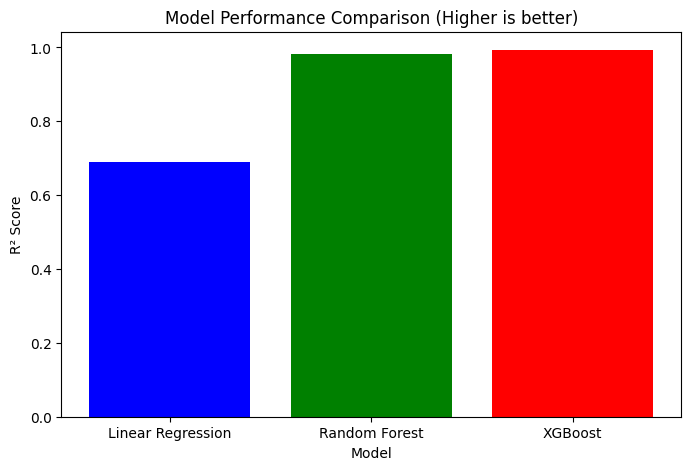

In [11]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Random Forest", "XGBoost"]
r2_scores = [r2_lr, r2_rf, r2_xgb]
rmse_scores = [rmse_lr, rmse_rf, rmse_xgb]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (Higher is better)")
plt.savefig("model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

## Save the Best Model

In [12]:
import joblib

joblib.dump(xgb_model, "best_car_price_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# Feature Engineering

## 1.1 Handling Missing Values

In [13]:
# Check missing values
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


## 1.2 Feature Transformation (Scaling & Normalization)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [15]:
# Check for object (categorical) columns
cat_cols = X_train.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_cols)

Categorical Columns: Index([], dtype='object')


## 1.3 Feature Selection

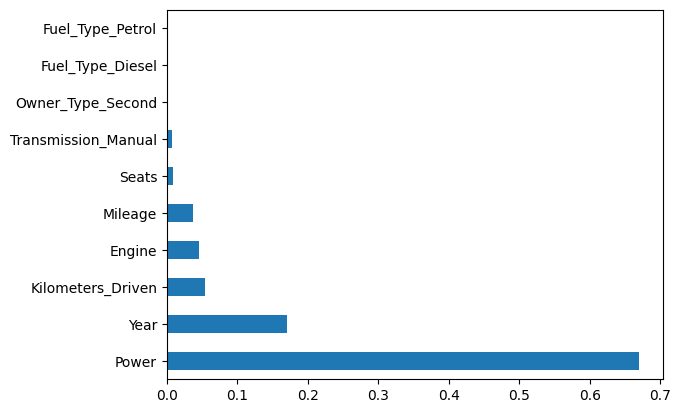

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

# Hyperparameter Tuning

## 2.1 Random Forest Hyperparameter Tuning

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_grid_rf, cv=3, scoring="r2", n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best Parameters for RF:", rf_search.best_params_)

Best Parameters for RF: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


## XGBoost Hyperparameter Tuning

In [18]:
from xgboost import XGBRegressor

param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42),
                                param_grid_xgb, cv=3, scoring="r2", n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("Best Parameters for XGBoost:", xgb_search.best_params_)

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}


## Final Model Selection & Evaluation

In [19]:
best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

y_pred_rf = best_rf.predict(X_train)
y_pred_xgb = best_xgb.predict(X_train)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error

r2_rf = r2_score(y_train, y_pred_rf)
rmse_rf = mean_squared_error(y_train, y_pred_rf) ** 0.5

r2_xgb = r2_score(y_train, y_pred_xgb)
rmse_xgb = mean_squared_error(y_train, y_pred_xgb) ** 0.5

print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")
print(f"XGBoost - R²: {r2_xgb:.3f}, RMSE: {rmse_xgb:.3f}")

Random Forest - R²: 0.963, RMSE: 2.200
XGBoost - R²: 0.986, RMSE: 1.343


In [20]:
import joblib

if r2_xgb > r2_rf:
    joblib.dump(best_xgb, "best_model_xgb.pkl")
    print("Saved XGBoost model!")
else:
    joblib.dump(best_rf, "best_model_rf.pkl")
    print("Saved Random Forest model!")

Saved XGBoost model!


Text(0.5, 1.0, 'XGBoost Feature Importance')

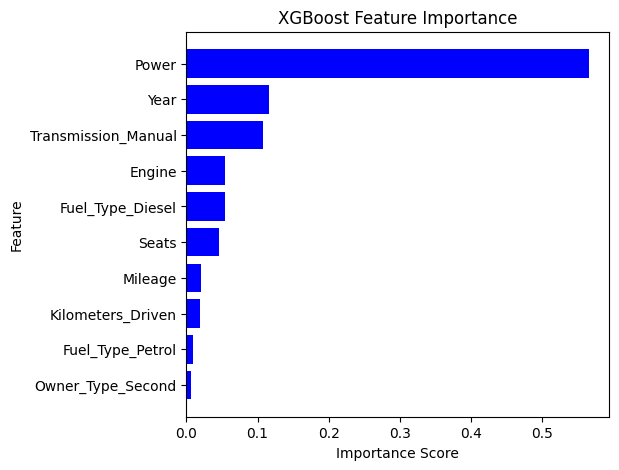

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_

# Feature importance from Random Forest
rf_importance = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance
sorted_idx_xgb = np.argsort(xgb_importance)[::-1]  # Descending order
sorted_idx_rf = np.argsort(rf_importance)[::-1]

# Select top 10 features
top_n = 10
top_features_xgb = feature_names[sorted_idx_xgb[:top_n]]
top_features_rf = feature_names[sorted_idx_rf[:top_n]]

# Plot XGBoost Feature Importance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(top_features_xgb[::-1], xgb_importance[sorted_idx_xgb[:top_n]][::-1], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")

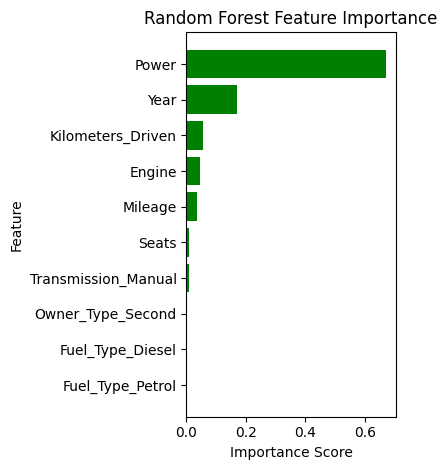

In [22]:
# Plot Random Forest Feature Importance
plt.subplot(1, 2, 2)
plt.barh(top_features_rf[::-1], rf_importance[sorted_idx_rf[:top_n]][::-1], color="green")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")

plt.tight_layout()
plt.show()

In [23]:
import numpy as np

top_n = 10  # Keep top 10 most important features

# Get top features from XGBoost
sorted_idx_xgb = np.argsort(xgb_model.feature_importances_)[::-1]
top_features_xgb = X_train.columns[sorted_idx_xgb[:top_n]]

# Get top features from Random Forest
sorted_idx_rf = np.argsort(rf_model.feature_importances_)[::-1]
top_features_rf = X_train.columns[sorted_idx_rf[:top_n]]

# Take the **union** of important features from both models
selected_features = list(set(top_features_xgb) | set(top_features_rf))  # Avoid dropping too much

# Filter dataset
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

print("✅ Selected Features:", selected_features)
print("🔹 New X_train shape:", X_train_selected.shape)

✅ Selected Features: ['Mileage', 'Engine', 'Transmission_Manual', 'Owner_Type_Second', 'Power', 'Seats', 'Year', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Kilometers_Driven']
🔹 New X_train shape: (4699, 10)


In [24]:
# Train XGBoost
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_val_selected)

# Train Random Forest
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_val_selected)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"📊 {model_name} Performance:\n R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}\n")

# Evaluate both models
evaluate_model(y_val, y_pred_rf, "Random Forest")
evaluate_model(y_val, y_pred_xgb, "XGBoost")

📊 Random Forest Performance:
 R²: 0.904, RMSE: 3.224, MAE: 1.549

📊 XGBoost Performance:
 R²: 0.890, RMSE: 3.445, MAE: 1.521

